In [2]:
pip install rasterio

     --------------------------------------- 23.4/23.4 MB 15.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
RedV1 = gpd.read_file(r'D:\PhD\TickBase\Yan\Simulated_GPS\Ramah_RedV1.shp')
RedV2 = gpd.read_file(r'D:\PhD\TickBase\Yan\Simulated_GPS\Ramah_RedV2.shp')
Cove = gpd.read_file(r'D:\PhD\TickBase\Yan\Simulated_GPS\Ramah_Cove.shp')
BlackMesa = gpd.read_file(r'D:\PhD\TickBase\Yan\Simulated_GPS\Ramah_BlackMesa.shp')

In [3]:
# Sentinel-2 10m LULC Time Series data
# https://www.arcgis.com/home/item.html?id=d3da5dd386d140cf93fc9ecbf8da5e31
# https://livingatlas.arcgis.com/landcoverexplorer/#mapCenter=-3.286%2C31.34%2C3&mode=step&timeExtent=2017%2C2021&year=2022&downloadMode=true
# 2022
Senti_file_AZ = rasterio.open(r'D:\PhD\TickBase\Yan\Envi_Data\LandCover\Senti_Esri\AZ\12S_20220101-20230101.tif')
Senti_file_NM = rasterio.open(r'D:\PhD\TickBase\Yan\Envi_Data\LandCover\Senti_Esri\NM\13S_20220101-20230101.tif')

In [4]:
time_period = 14 # "2 weeks"
start_time = 1 # 1 day after the origin point 
end_time = 1 # 1 day before the last point

In [5]:
coords = [(x,y) for x,y in zip(RedV2.geometry.x,RedV2.geometry.y)]
RedV2['LULC'] = [x[0] for x in Senti_file_AZ.sample(coords)]
#RedV2.loc[RedV2['RasterV']!=0]

In [6]:
count_set = []
LULC_set = np.unique(RedV2['LULC'])
for i in LULC_set:
    count = sum(1 for x in RedV2['LULC'] if x == i)
    count_set.append(count)
count_set

[487, 2230]

In [8]:
tmp_start_time = RedV2.loc[0,'time']
tmp_end_time = RedV2.loc[df_shape[0]-1,'time']
n_period = (tmp_end_time - tmp_start_time).total_seconds()/3600/24/time_period
range(int(n_period))

NameError: name 'df_shape' is not defined

In [25]:
RedV2.head()

,GMT Time,Latitude,Longitude,Altitude,Duration,Temperatur,Voltage,DOP,Satellites,Cause of F,Lab_Coord,Lab_Dur,Lab_Sat,Lab_Alt,No,time,distance,speed,geometry,LULC
0,8/10/2021 14:31,34.790283,-108.305657,2690.83,65,19.0,0,3.0,5,GPS Schedule,0.0,0.0,0.0,0.0,1,2021-08-10 08:31:00,-1.000000,-1.000000,POINT (746520.733 3853095.300),11
1,8/10/2021 14:45,34.795679,-108.303513,2690.13,3,18.0,0,3.6,5,GPS Schedule,0.0,0.0,0.0,0.0,2,2021-08-10 08:45:00,45.880294,3.276863,POINT (746700.929 3853699.248),2
2,8/10/2021 15:00,34.792382,-108.297636,2685.92,3,18.5,0,3.8,5,GPS Schedule,0.0,0.0,0.0,0.0,3,2021-08-10 09:00:00,85.194239,2.353872,POINT (747248.551 3853347.996),11
3,8/10/2021 15:15,34.794316,-108.304693,2677.39,3,18.5,0,3.2,5,GPS Schedule,0.0,0.0,0.0,0.0,4,2021-08-10 09:15:00,8.960635,0.463648,POINT (746596.977 3853545.118),11
4,8/10/2021 15:30,34.799378,-108.307767,2651.16,2,18.5,0,2.6,5,GPS Schedule,0.0,0.0,0.0,0.0,5,2021-08-10 09:30:00,9.585296,0.702347,POINT (746300.609 3854099.176),11


In [53]:
count

506

In [52]:
count_set

[135, 506]

In [59]:
count_set = pd.DataFrame(columns = np.unique(RedV2['LULC']))
count_set.loc[0] = np.zeros(np.unique(RedV2['LULC']).shape)

for n in range(int(n_period)):
    tmp_count_set = []
    for i in LULC_set:
        count = sum(1 for x,y in zip(RedV2['LULC'], RedV2['time']) if x == i and 
                    y >= period_start_time + timedelta(days=n*time_period) and y <= period_start_time + timedelta(days=(n+1)*time_period))
        tmp_count_set.append(count)
    count_set.loc[n] = tmp_count_set
count_set

,2,11
0,135.0,506.0
1,127.0,503.0
2,130.0,518.0
3,91.0,534.0


In [71]:
time_set = pd.DataFrame(0,columns = np.unique(RedV2['LULC']), index = range(int(n_period)))
time_set

,2,11
0,4180,15994
1,4092,16053
2,4275,15870
3,2611,17534


In [73]:
time_set = pd.DataFrame(0,columns = np.unique(RedV2['LULC']), index = range(int(n_period+1)))
#time_set.loc[0] = np.zeros(np.unique(RedV2['LULC']).shape)
n = 0
for i in RedV2.index:
    if i == RedV2.shape[0] - 1:
        break
    if RedV2.loc[i,'time'] >= period_start_time + timedelta(days=n*time_period) and RedV2.loc[i,'time'] <= period_start_time + timedelta(days=(n+1)*time_period):
        for j in LULC_set:
            if RedV2.loc[i,'LULC'] == j:
                time_set.loc[n,j] = time_set.loc[n,j] + (RedV2.loc[i+1,'time']-RedV2.loc[i,'time']).total_seconds()/60.0
                break
    else:
        n = n + 1
        

time_set

,2,11
0,4180,15994
1,4092,16053
2,4275,15870
3,2611,17534
4,135,4245


In [80]:
count_set.iloc[0]

2     135
11    506
Name: 0, dtype: int64

<font color = 'Blue'> <b>Class Data (no numeric)</b>
<br>
</font>

Text(0.5, 1.0, 'Time (min)')

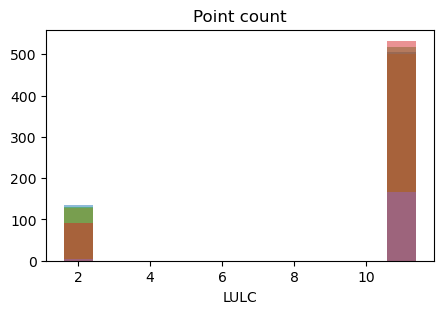

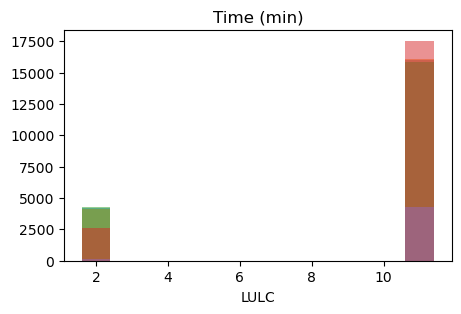

In [12]:
df_shape = RedV2.shape
RedV2['time'] = pd.to_datetime(RedV2['time'], format = '%m/%d/%Y %H:%M')

period_start_time = RedV2.loc[0,'time']
tmp_start_time = RedV2.loc[0,'time']
tmp_end_time = RedV2.loc[df_shape[0]-1,'time']

n_period = (tmp_end_time - tmp_start_time).total_seconds()/3600/24/time_period



count_set = pd.DataFrame(0,columns = np.unique(RedV2['LULC']), index = range(int(n_period+1)))
n = 0
for i in RedV2.index:
    if i == RedV2.shape[0] - 1:
        break
    if RedV2.loc[i,'time'] >= period_start_time + timedelta(days=n*time_period) and RedV2.loc[i,'time'] <= period_start_time + timedelta(days=(n+1)*time_period):
        for j in LULC_set:
            if RedV2.loc[i,'LULC'] == j:
                count_set.loc[n,j] = count_set.loc[n,j] + 1
                break
    else:
        n = n + 1
    
#count_set = np.array(count_set)

time_set = pd.DataFrame(0,columns = np.unique(RedV2['LULC']), index = range(int(n_period+1)))
n = 0
for i in RedV2.index:
    if i == RedV2.shape[0] - 1:
        break
    if RedV2.loc[i,'time'] >= period_start_time + timedelta(days=n*time_period) and RedV2.loc[i,'time'] <= period_start_time + timedelta(days=(n+1)*time_period):
        for j in LULC_set:
            if RedV2.loc[i,'LULC'] == j:
                time_set.loc[n,j] = time_set.loc[n,j] + (RedV2.loc[i+1,'time']-RedV2.loc[i,'time']).total_seconds()/60.0
                break
    else:
        n = n + 1

fig, ax = plt.subplots(figsize = (5,3))
for n in range(int(n_period)+1):
    plt.bar(np.unique(RedV2['LULC']),count_set.iloc[n],alpha = 0.5)
plt.xlabel('LULC')
ax.set_title('Point count')

fig1, ax1 = plt.subplots(figsize = (5,3))
for n in range(int(n_period)+1):
    plt.bar(np.unique(RedV2['LULC']),time_set.iloc[n],alpha = 0.5)
plt.xlabel('LULC')
ax1.set_title('Time (min)')

In [95]:
RedV2.shape[0]
LULC_set

array([ 2, 11], dtype=int8)